In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, r2_score, mean_squared_error, classification_report

### Objectif : Mettre en place un modèle de Random Forest pour prédire la survie des passagers du Titanic.

Étapes :

    Nettoyage des données :
        Vérifiez s'il y a des valeurs manquantes dans le dataset et traitez-les en utilisant des stratégies appropriées.
        Convertissez les variables catégorielles en variables numériques si nécessaire.

    Random Forest pour la Classification (Prédiction de Survie) :
        Utilisez la bibliothèque scikit-learn en Python.
        Divisez le dataset en ensembles d'entraînement (training set) et de test (test set).
        Entraînez un modèle de Random Forest pour prédire la survie des passagers.
        Évaluez les performances du modèle en utilisant des métriques appropriées pour la classification (par exemple, l'accuracy).

    Bagging ou Pasting :
        Comparez les performances du Random Forest avec bagging et du Random Forest avec pasting.
        Utilisez différentes valeurs pour le nombre d'estimateurs (arbres) et observez comment cela affecte les performances.
        Choisissez une métrique d'évaluation appropriée pour comparer les deux approches.

    Analyse des Résultats :
        Analysez et interprétez les résultats obtenus.
        Identifiez les hyperparamètres optimaux pour chaque modèle.
        Comparez les métriques pour évaluer l'impact du bagging/pasting sur les performances du Random Forest.

In [195]:
# Fonction d'évaluation étendue
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    if hasattr(model, 'predict_proba'):  # Vérifie si le modèle a une méthode 'predict_proba'
        y_proba = model.predict_proba(X_test)[:, 1]  # Probabilité de la classe positive
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = None

    if len(set(y_test)) == 2:  # Classification binaire
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        gini = 2 * roc_auc - 1 if roc_auc is not None else None

        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"F1 Score: {f1}")
        print(f"Gini: {gini}")
    else:  # Régression
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        r2 = r2_score(y_test, y_pred)

        print(f"Mean Squared Error: {mse}")
        print(f"Root Mean Squared Error: {rmse}")
        print(f"R2 Score: {r2}")

Objectif :

Mettre en place un modèle de Random Forest pour prédire la survie des passagers du Titanic.

In [196]:
# Charger les données
df = pd.read_csv("datasets/titanic.csv")

Nettoyage des données :

        Vérifiez s'il y a des valeurs manquantes dans le dataset et traitez-les en utilisant des stratégies appropriées.
        
        Convertissez les variables catégorielles en variables numériques si nécessaire.

In [197]:
# Supprimer les colonnes non nécessaires
df = df.drop(["name", "ticket", "cabin", "boat", "body", "home.dest"], axis=1)

# Convertir la variable catégorielle 'sex' en numérique
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

# Gérer les valeurs manquantes
imputer = SimpleImputer(strategy="mean")
df[['age', 'fare']] = imputer.fit_transform(df[['age', 'fare']])

# Convertir la variable catégorielle 'embarked' en numérique
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

# Supprimer les lignes avec des valeurs manquantes dans la variable cible 'survived'
df = df.dropna(subset=['survived'])

# Diviser le dataset en ensembles d'entraînement et de test
X = df.drop("survived", axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Supprimer les lignes avec des valeurs manquantes dans y_train
y_train = y_train.dropna()

Random Forest pour la Classification (Prédiction de Survie) :

        Utilisez la bibliothèque scikit-learn en Python.

        Divisez le dataset en ensembles d'entraînement (training set) et de test (test set).

        Entraînez un modèle de Random Forest pour prédire la survie des passagers.
        
        Évaluez les performances du modèle en utilisant des métriques appropriées pour la classification (par exemple, l'accuracy).

In [198]:
# Entraîner un modèle de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Évaluer les performances du modèle
evaluate_model(rf_model, X_test, y_test)

Accuracy: 0.7977099236641222
Precision: 0.8282828282828283
F1 Score: 0.7557603686635945
Gini: 0.7220456685499057


Bagging ou Pasting :
        Comparez les performances du Random Forest avec bagging et du Random Forest avec pasting.

        Utilisez différentes valeurs pour le nombre d'estimateurs (arbres) et observez comment cela affecte les performances.
        
        Choisissez une métrique d'évaluation appropriée pour comparer les deux approches.


In [199]:
# Bagging avec Random Forest
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Évaluer les performances du modèle de bagging
print("Bagging Model:")
evaluate_model(bagging_model, X_test, y_test)

# Pasting avec Random Forest
pasting_model = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42, bootstrap=False)
pasting_model.fit(X_train, y_train)

# Évaluer les performances du modèle de pasting
print("Pasting Model:")
evaluate_model(pasting_model, X_test, y_test)

/home/utilisateur/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Analyse des Résultats :
        Analysez et interprétez les résultats obtenus.

        Identifiez les hyperparamètres optimaux pour chaque modèle.
        
        Comparez les métriques pour évaluer l'impact du bagging/pasting sur les performances du Random Forest.

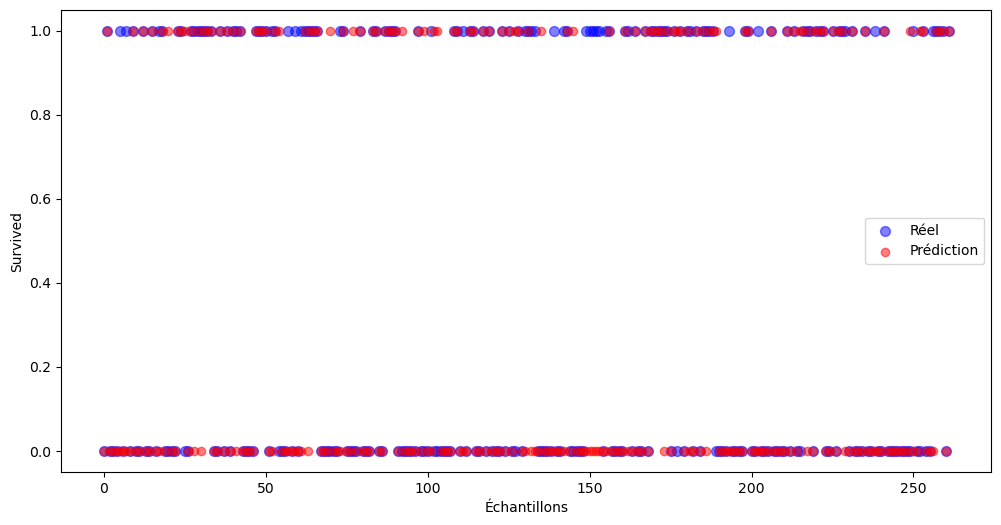

In [ ]:
# Obtenir les prédictions du modèle
y_pred = rf_model.predict(X_test)

# Créer un graphique
plt.figure(figsize=(12, 6))

# Tracer les valeurs réelles avec des marqueurs plus grands
plt.scatter(range(len(y_test)), y_test, color='blue', label='Réel', alpha=0.5, s=50)

# Tracer les valeurs prédites
plt.scatter(range(len(y_test)), y_pred, color='red', label='Prédiction', alpha=0.5)

# Ajouter des labels et une légende
plt.xlabel('Échantillons')
plt.ylabel('Survived')
plt.legend()

# Afficher le graphique
plt.show()

Objectif :
Mettre en place un modèle de Random Forest pour prédire la survie des passagers du Titanic.

Étapes :

    Nettoyage des données :
        Vérifiez s'il y a des valeurs manquantes dans le dataset et traitez-les en utilisant des stratégies appropriées.
        Convertissez les variables catégorielles en variables numériques si nécessaire.

    Random Forest pour la Classification (Prédiction de Survie) :
        Utilisez la bibliothèque scikit-learn en Python.
        Divisez le dataset en ensembles d'entraînement (training set) et de test (test set).
        Entraînez un modèle de Random Forest pour prédire la survie des passagers.
        Évaluez les performances du modèle en utilisant des métriques appropriées pour la classification (par exemple, l'accuracy).

    Bagging ou Pasting :
        Comparez les performances du Random Forest avec bagging et du Random Forest avec pasting.
        Utilisez différentes valeurs pour le nombre d'estimateurs (arbres) et observez comment cela affecte les performances.
        Choisissez une métrique d'évaluation appropriée pour comparer les deux approches.

    Analyse des Résultats :
        Analysez et interprétez les résultats obtenus.
        Identifiez les hyperparamètres optimaux pour chaque modèle.
        Comparez les métriques pour évaluer l'impact du bagging/pasting sur les performances du Random Forest.

    Questions de Discussion :
        Comparez les résultats obtenus avec le Bagging et le Pasting. Quelles observations pouvez-vous faire sur la performance des deux méthodes ?
        Expliquez comment l'utilisation de l'échantillonnage avec remplacement (Bagging) peut influencer la performance par rapport à l'utilisation de l'échantillonnage sans remplacement (Pasting).
        Comment les métriques F1 et R2 sont-elles utilisées pour évaluer la performance d'un modèle de régression ? Quelles informations fournissent-elles ?

N'oubliez pas d'utiliser les hyperparamètres vus précédemment (nombre d'estimateurs, critère de mesure de la pureté, etc.) pour ajuster vos modèles. Bon exercice !